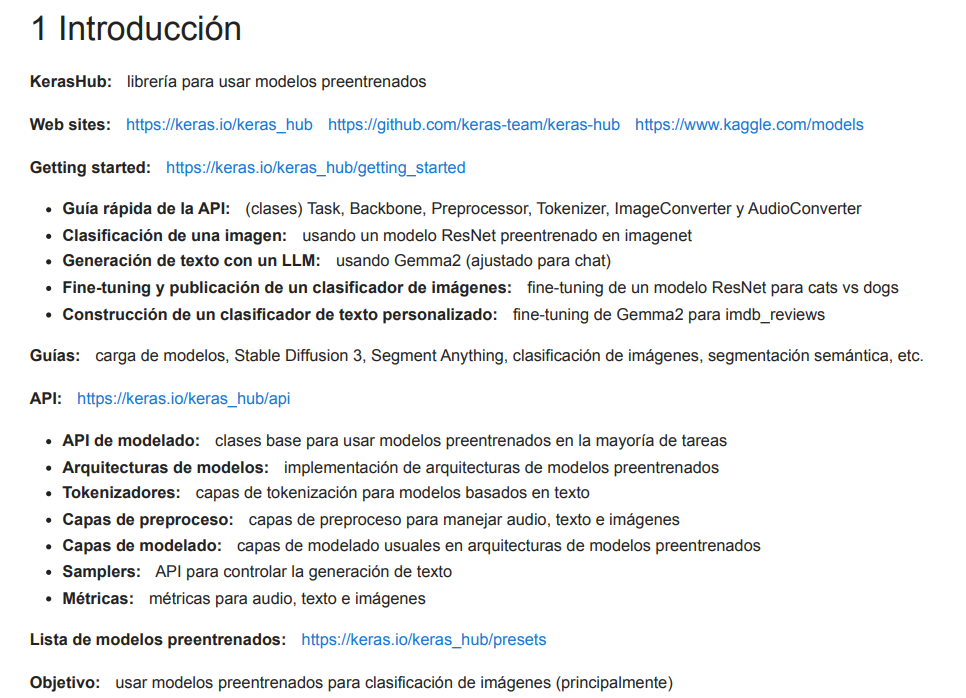

# ¿Qué es KerasHub?

[KerasHub](https://github.com/keras-team/keras-hub) es una librería oficial desarrollada por el equipo de Keras que proporciona una forma sencilla y estandarizada de acceder a modelos preentrenados listos para usar, llamados *presets*. Estos modelos están organizados en distintas categorías como clasificación de imágenes, segmentación, detección de objetos y más.

KerasHub permite cargar arquitecturas conocidas (como ResNet, EfficientNet, MobileNet, etc.) ya entrenadas en conjuntos de datos como ImageNet, sin necesidad de preocuparse por detalles de implementación o pesos.

Su principal ventaja es que los modelos están completamente integrados con la API de Keras, por lo que se pueden usar directamente como parte de un flujo estándar de `model.fit`, `model.evaluate`, `model.predict`, o como *backbone* dentro de una arquitectura más compleja.

Esto hace que sea especialmente útil para tareas como:
- Transfer learning (aprendizaje por transferencia)
- Fine-tuning (ajuste fino)
- Extracción de características
- Comparación rápida entre arquitecturas

En esta libreta exploraremos cómo usar KerasHub para cargar un modelo preentrenado, inspeccionar su arquitectura y entender cómo integrarlo en un flujo de trabajo típico en visión por computador.

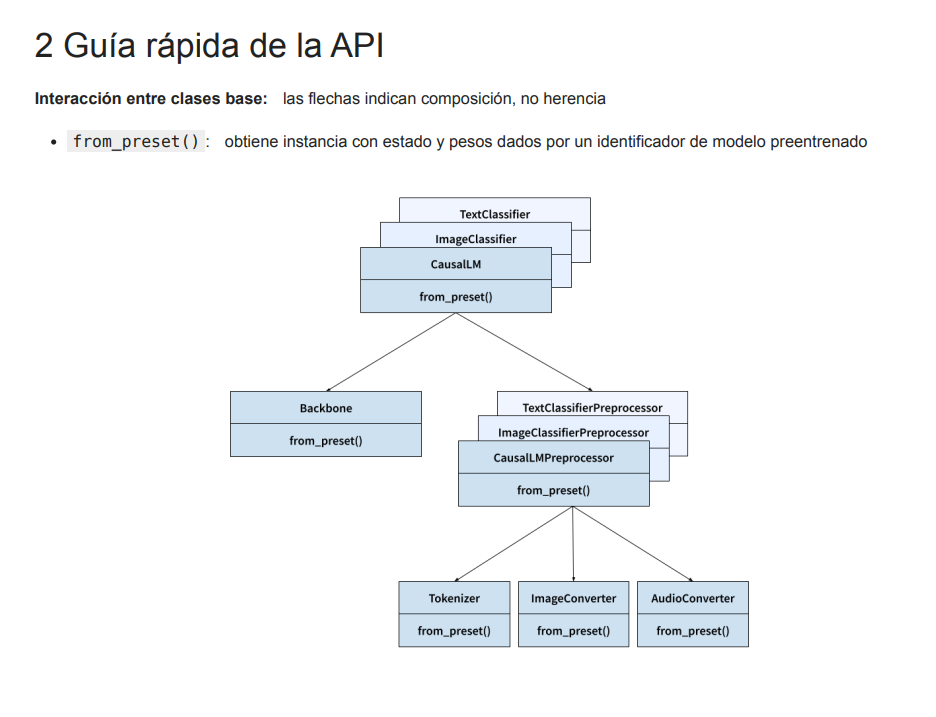

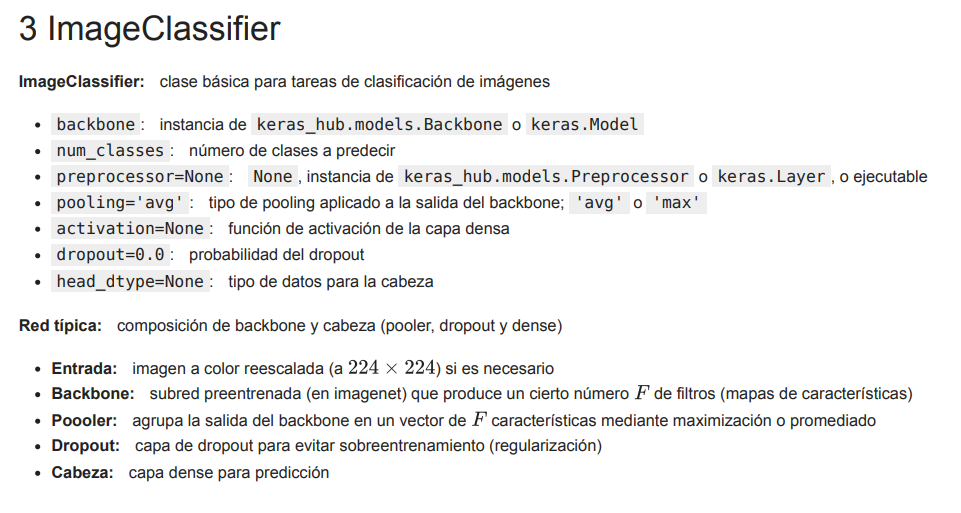

## ¿Qué es `ImageClassifier`?

`ImageClassifier` es una clase de la librería `keras_hub.models` que representa una arquitectura completa para clasificación de imágenes. A diferencia de `Backbone`, que solo proporciona la parte base del modelo (sin capa de salida específica), `ImageClassifier` incluye todo lo necesario para realizar una tarea de clasificación de imágenes de principio a fin.

Esto incluye:
- Un *backbone* preentrenado (como ResNet, EfficientNet, etc.) que actúa como extractor de características.
- Una capa de *pooling* y normalización.
- Una capa densa final con activación softmax, adaptada al número de clases del preset (por ejemplo, 1000 para ImageNet).

Al utilizar `ImageClassifier.from_preset()`, se carga un modelo ya entrenado y listo para ser evaluado o usado como punto de partida para aprendizaje por transferencia.

Esto lo hace ideal para:
- Evaluar rápidamente el rendimiento de distintos modelos sobre nuevos datos.
- Extraer embeddings de imágenes usando las capas intermedias.
- Entrenar un modelo personalizado a partir de uno ya preentrenado.

En resumen, `ImageClassifier` es una solución "todo en uno" para clasificación de imágenes, mientras que `Backbone` se usa más como bloque modular dentro de arquitecturas más complejas o personalizadas.

## Cargando un Modelo Backbone de KerasHub

En esta celda, cargamos un modelo preentrenado utilizando `keras_hub.models.Backbone`. En este caso, hemos optado por el modelo ResNet50, específicamente la versión "resnet_vd_50_ssld_v2_imagenet", que es un modelo profundo entrenado en el conjunto de datos ImageNet.

```python
import keras_hub
B = keras_hub.models.Backbone.from_preset('resnet_vd_50_ssld_v2_imagenet')

In [4]:
import keras_hub; B = keras_hub.models.Backbone.from_preset('resnet_vd_50_ssld_v2_imagenet')
print(f'Primeras capas de un total de {len(B.layers)} capas:\n')
B.summary(line_length=95, positions=[0.38, 0.68, 0.80, 1.], show_trainable=True, layer_range=('input', 'conv2'))

Primeras capas de un total de 187 capas:



Model: "res_net_backbone_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape            ┃ Param # ┃ Connected to  ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, None, None, 3)   │       0 │ -             │    -    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, None, None, 3)   │       0 │ input_layer_… │    -    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv1_conv (Conv2D)           │ (None, None, None, 32)  │     864 │ conv1_pad[0]… │    Y    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv1_bn (BatchNormalization) │ (None, None, None, 32)  │     128 │ conv1_conv[0… │    Y    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv1_relu (Activation)       │ (None, None, None, 32)  │       0 │ conv1_bn[0][… │    -    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv2_conv (Conv2D)           │ (None, None, None, 32)  │   9,216 │ conv1_relu[0… │    Y    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv2_bn (BatchNormalization) │ (None, None, None, 32)  │     128 │ conv2_conv[0… │    Y    │
├───────────────────────────────┼─────────────────────────┼─────────┼───────────────┼─────────┤
│ conv2_relu (Activation)       │ (None, None, None, 32)  │       0 │ conv2_bn[0][… │    -    │
└───────────────────────────────┴─────────────────────────┴─────────┴───────────────┴─────────┘

 Total params: 23,580,512 (89.95 MB)

 Trainable params: 23,527,264 (89.75 MB)

 Non-trainable params: 53,248 (208.00 KB)

## Cargando un Modelo ImageClassifier de KerasHub

En esta celda, cargamos un modelo preentrenado utilizando `keras_hub.models.ImageClassifier`. A diferencia del modelo `Backbone`, `ImageClassifier` incluye una capa final de clasificación adaptada para una tarea específica. En este caso, estamos utilizando la versión "resnet_vd_50_ssld_v2_imagenet" de ResNet50, preentrenada en ImageNet, pero configurada para clasificar 10 clases en lugar de las 1000 clases originales de ImageNet.

```python
import keras
import keras_hub
M = keras_hub.models.ImageClassifier.from_preset('resnet_vd_50_ssld_v2_imagenet', num_classes=10)

In [8]:
import keras; import keras_hub
M = keras_hub.models.ImageClassifier.from_preset('resnet_vd_50_ssld_v2_imagenet', num_classes=10)
M.summary(line_length=95, positions=[0.38, 0.68, 0.80, 1.], show_trainable=True)

TypeError: <class 'keras_hub.src.models.resnet.resnet_image_classifier.ResNetImageClassifier'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras_hub.src.models.resnet.resnet_image_classifier', 'class_name': 'ResNetImageClassifier', 'config': {'backbone': <ResNetBackbone name=res_net_backbone_14, built=True>, 'preprocessor': {'module': 'keras_hub.src.models.resnet.resnet_image_classifier_preprocessor', 'class_name': 'ResNetImageClassifierPreprocessor', 'config': {'name': 'res_net_image_classifier_preprocessor_14', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'image_converter': {'module': 'keras_hub.src.models.resnet.resnet_image_converter', 'class_name': 'ResNetImageConverter', 'config': {'name': 'res_net_image_converter_14', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'image_size': [224, 224], 'scale': [0.017124753831663668, 0.01750700280112045, 0.017429193899782133], 'offset': [-2.1179039301310043, -2.0357142857142856, -1.8044444444444445], 'interpolation': 'bilinear', 'crop_to_aspect_ratio': True}, 'registered_name': 'keras_hub>ResNetImageConverter'}, 'config_file': 'preprocessor.json'}, 'registered_name': 'keras_hub>ResNetImageClassifierPreprocessor'}, 'name': 'res_net_image_classifier_14', 'num_classes': 10, 'pooling': 'avg', 'activation': None, 'dropout': 0.0}, 'registered_name': 'keras_hub>ResNetImageClassifier'}.

Exception encountered: <class 'keras_hub.src.models.resnet.resnet_image_classifier_preprocessor.ResNetImageClassifierPreprocessor'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras_hub.src.models.resnet.resnet_image_classifier_preprocessor', 'class_name': 'ResNetImageClassifierPreprocessor', 'config': {'name': 'res_net_image_classifier_preprocessor_14', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'image_converter': {'module': 'keras_hub.src.models.resnet.resnet_image_converter', 'class_name': 'ResNetImageConverter', 'config': {'name': 'res_net_image_converter_14', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'image_size': [224, 224], 'scale': [0.017124753831663668, 0.01750700280112045, 0.017429193899782133], 'offset': [-2.1179039301310043, -2.0357142857142856, -1.8044444444444445], 'interpolation': 'bilinear', 'crop_to_aspect_ratio': True}, 'registered_name': 'keras_hub>ResNetImageConverter'}, 'config_file': 'preprocessor.json'}, 'registered_name': 'keras_hub>ResNetImageClassifierPreprocessor'}.

Exception encountered: <class 'keras_hub.src.models.resnet.resnet_image_converter.ResNetImageConverter'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras_hub.src.models.resnet.resnet_image_converter', 'class_name': 'ResNetImageConverter', 'config': {'name': 'res_net_image_converter_14', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'image_size': [224, 224], 'scale': [0.017124753831663668, 0.01750700280112045, 0.017429193899782133], 'offset': [-2.1179039301310043, -2.0357142857142856, -1.8044444444444445], 'interpolation': 'bilinear', 'crop_to_aspect_ratio': True}, 'registered_name': 'keras_hub>ResNetImageConverter'}.

Exception encountered: Error when deserializing class 'ResNetImageConverter' using config={'name': 'res_net_image_converter_14', 'trainable': True, 'dtype': 'float32', 'image_size': [224, 224], 'scale': [0.017124753831663668, 0.01750700280112045, 0.017429193899782133], 'offset': [-2.1179039301310043, -2.0357142857142856, -1.8044444444444445], 'interpolation': 'bilinear', 'crop_to_aspect_ratio': True}.

Exception encountered: ResNetImageConverter requires `tensorflow` and `tensorflow-text` for text processing. Run `pip install tensorflow-text` to install both packages or visit https://www.tensorflow.org/install

If `tensorflow-text` is already installed, try importing it in a clean python session. Your installation may have errors.

KerasHub uses `tf.data` and `tensorflow-text` to preprocess text on all Keras backends. If you are running on Jax or Torch, this installation does not need GPU support.

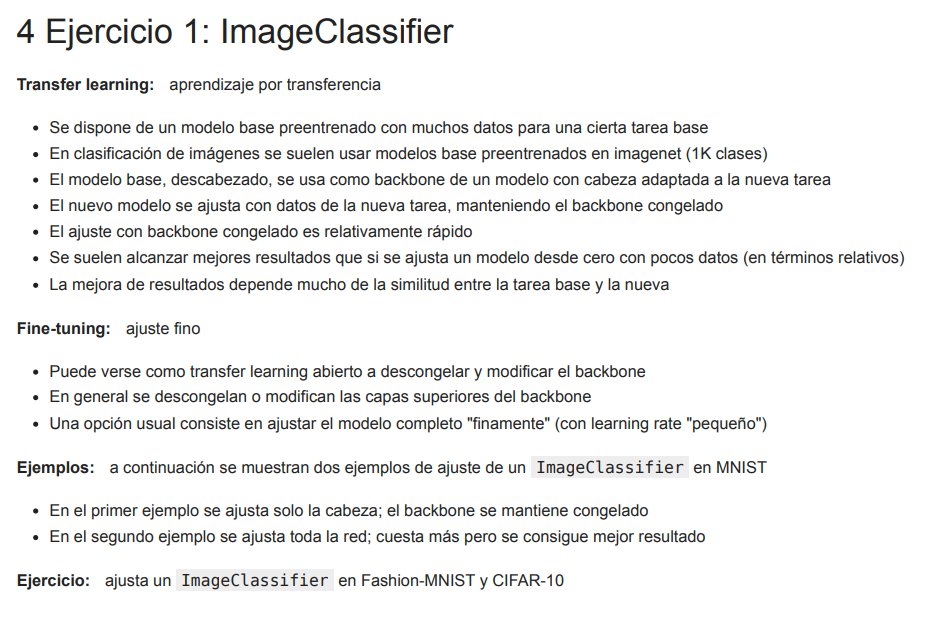

<h1>MNIST TRANSFER LEARNING<h1>

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.4685 - loss: 1.7776 - val_accuracy: 0.6873 - val_loss: 1.1618 - learning_rate: 1.6000e-04
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.6844 - loss: 1.1330 - val_accuracy: 0.7277 - val_loss: 0.9449 - learning_rate: 1.6000e-04
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7231 - loss: 0.9586 - val_accuracy: 0.7550 - val_loss: 0.8364 - learning_rate: 1.6000e-04
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7452 - loss: 0.8637 - val_accuracy: 0.7717 - val_loss: 0.7680 - learning_rate: 1.6000e-04
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7607 - loss: 0.8012 - val_accuracy: 0.7852 - val_loss: 0.7197 - learning_rate: 1.6000e-04
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7738 - loss: 0.7558 - val_accuracy: 0.7953 - val_loss: 0.6832 - learning_rate: 1.6000e-04
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1

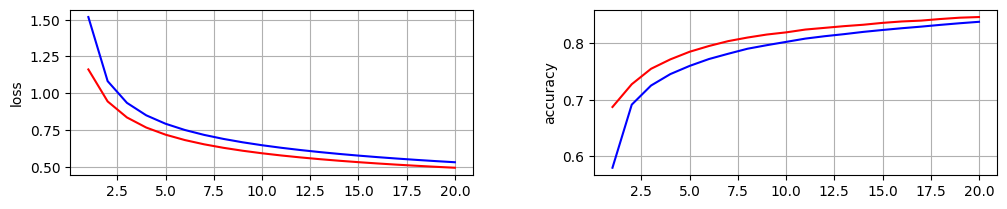

In [ ]:
!pip install silence_tensorflow

import numpy as np; import matplotlib.pyplot as plt; import silence_tensorflow
import keras; import keras_hub; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1); x_test = x_test.reshape(-1, 28, 28, 1)

import time; start = time.time()
preprocessor = keras.layers.Pipeline([keras.layers.Rescaling(1.0 / 255), keras.layers.Conv2D(3, 1)])
M = keras_hub.models.ImageClassifier.from_preset('resnet_vd_50_ssld_v2_imagenet', num_classes=10,
 preprocessor=preprocessor, activation='softmax', dropout=0.0)
M.layers[1].trainable = False
optimizer = keras.optimizers.Adam(learning_rate=0.00016)
M.compile(optimizer=optimizer, loss='crossentropy', metrics=['accuracy'])
reduce_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.38, patience=10)
early_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
H = M.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.1, callbacks=[reduce_cb, early_cb])

acc_train = M.evaluate(x_train, y_train, verbose=0)[1]; acc_test = M.evaluate(x_test, y_test, verbose=0)[1]
print(f'Precisiones train-test: {acc_train:.2%} {acc_test:.2%}')
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

fig, axs = plt.subplots(1, 2, figsize=(10, 2.25)); fig.tight_layout(); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1); ax = axs[0]; ax.grid(); ax.set_ylabel('loss')
ax.plot(xx, H.history['loss'], 'b-', xx, H.history['val_loss'], 'r-'); ax = axs[1]; ax.grid()
ax.set_ylabel('accuracy'); ax.plot(xx, H.history['accuracy'], 'b-', xx, H.history['val_accuracy'], 'r-');

<h1>MNIST FINE-TUNING<h1>

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; import silence_tensorflow
import keras; import keras_hub; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1); x_test = x_test.reshape(-1, 28, 28, 1)

import time; start = time.time()
preprocessor = keras.layers.Pipeline([keras.layers.Rescaling(1.0 / 255), keras.layers.Conv2D(3, 1)])
M = keras_hub.models.ImageClassifier.from_preset('resnet_vd_50_ssld_v2_imagenet', num_classes=10,
 preprocessor=preprocessor, activation='softmax', dropout=0.6)
# M.layers[1].trainable = False
optimizer = keras.optimizers.Adam(learning_rate=0.00016)
M.compile(optimizer=optimizer, loss='crossentropy', metrics=['accuracy'])
reduce_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.38, patience=10)
early_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
H = M.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.1, callbacks=[reduce_cb, early_cb])

acc_train = M.evaluate(x_train, y_train, verbose=0)[1]; acc_test = M.evaluate(x_test, y_test, verbose=0)[1]
print(f'Precisiones train-test: {acc_train:.2%} {acc_test:.2%}')
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

fig, axs = plt.subplots(1, 2, figsize=(10, 2.25)); fig.tight_layout(); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1); ax = axs[0]; ax.grid(); ax.set_ylabel('loss')
ax.plot(xx, H.history['loss'], 'b-', xx, H.history['val_loss'], 'r-'); ax = axs[1]; ax.grid()
ax.set_ylabel('accuracy'); ax.plot(xx, H.history['accuracy'], 'b-', xx, H.history['val_accuracy'], 'r-');

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 145s 57ms/step - accuracy: 0.8347 - loss: 0.5311 - val_accuracy: 0.9708 - val_loss: 0.1171 - learning_rate: 1.6000e-04
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.9809 - loss: 0.0739 - val_accuracy: 0.9913 - val_loss: 0.0335 - learning_rate: 1.6000e-04
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9867 - loss: 0.0511 - val_accuracy: 0.9850 - val_loss: 0.0514 - learning_rate: 1.6000e-04
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9897 - loss: 0.0367 - val_accuracy: 0.9915 - val_loss: 0.0321 - learning_rate: 1.6000e-04
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.9905 - loss: 0.0336 - val_accuracy: 0.9905 - val_loss: 0.0331 - learning_rate: 1.6000e-04
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - accuracy: 0.9933 - loss: 0.0250 - val_accuracy: 0.9907 - val_loss: 0.0437 - learning_rate: 1.6000e-04
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

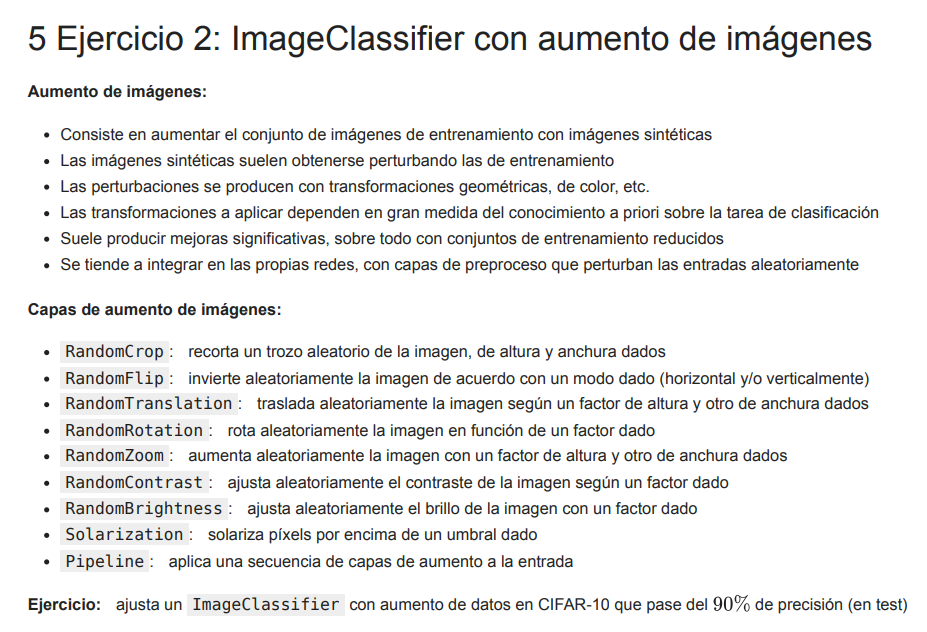

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; import silence_tensorflow
import keras; import keras_hub; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1); x_test = x_test.reshape(-1, 28, 28, 1)

factor = 2.0 / 32.0

import time; start = time.time()
preprocessor = keras.layers.Pipeline([keras.layers.RandomFlip('horizontal'), keras.layers.RandomTranslation(factor, factor, interpolation='nearest'), keras.layers.Rescaling(1.0 / 255)])
M = keras_hub.models.ImageClassifier.from_preset('resnet_vd_50_ssld_v2_imagenet', num_classes=10,
 preprocessor=preprocessor, activation='softmax', dropout=0.6)
# M.layers[1].trainable = False
optimizer = keras.optimizers.Adam(learning_rate=0.00016)
M.compile(optimizer=optimizer, loss='crossentropy', metrics=['accuracy'])
reduce_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.38, patience=10)
early_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
H = M.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.1, callbacks=[reduce_cb, early_cb])

acc_train = M.evaluate(x_train, y_train, verbose=0)[1]; acc_test = M.evaluate(x_test, y_test, verbose=0)[1]
print(f'Precisiones train-test: {acc_train:.2%} {acc_test:.2%}')
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

fig, axs = plt.subplots(1, 2, figsize=(10, 2.25)); fig.tight_layout(); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1); ax = axs[0]; ax.grid(); ax.set_ylabel('loss')
ax.plot(xx, H.history['loss'], 'b-', xx, H.history['val_loss'], 'r-'); ax = axs[1]; ax.grid()
ax.set_ylabel('accuracy'); ax.plot(xx, H.history['accuracy'], 'b-', xx, H.history['val_accuracy'], 'r-');